# Import package

In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from sklearn.cluster import AffinityPropagation, DBSCAN, Birch
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score
from scipy.spatial.distance import cdist

In [2]:
# Normalization function
def normalize(dataColumn):
    min_value = min(dataColumn)
    max_value = max(dataColumn)

    normalized_data = [(x-min_value)/(max_value - min_value) for x in dataColumn]

    return normalized_data

# Import data
shoppers_data = pd.read_csv("online_shoppers_intention.csv")

# Normalize when applicable
float_shoppers_data = shoppers_data.select_dtypes("float")

for i in float_shoppers_data.columns:
    shoppers_data[i] = normalize(float_shoppers_data[i])

int_shoppers_data = shoppers_data.select_dtypes("int")

for i in int_shoppers_data.columns:
    shoppers_data[i] = normalize(int_shoppers_data[i])

print(shoppers_data.describe())

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         0.085747                 0.023779       0.020982   
std          0.123029                 0.052013       0.052923   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          0.037037                 0.002207       0.000000   
75%          0.148148                 0.027438       0.000000   
max          1.000000                 1.000000       1.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                 0.013522        0.045009                 0.018676   
std                  0.055209        0.063086                 0.029913   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        0.00992

In [3]:
# Taking the relevant values for machine learning
columns_to_drop = ['Month', 'VisitorType']
numerical_shoppers_data = shoppers_data.drop(columns=columns_to_drop, errors='ignore')

# Recoding boolean values
numerical_shoppers_data['Weekend'] = numerical_shoppers_data['Weekend'].map({True: 1, False: 0})
numerical_shoppers_data['Revenue'] = numerical_shoppers_data['Revenue'].map({True: 1, False: 0})

print(numerical_shoppers_data.describe())

       Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         0.085747                 0.023779       0.020982   
std          0.123029                 0.052013       0.052923   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          0.037037                 0.002207       0.000000   
75%          0.148148                 0.027438       0.000000   
max          1.000000                 1.000000       1.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                 0.013522        0.045009                 0.018676   
std                  0.055209        0.063086                 0.029913   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        0.00992

# Part 1

## 1.2 Comparison between browser 13 and other browsers

In [4]:
b13_shoppers = shoppers_data.query('Browser == 1')
other_shoppers = shoppers_data.query('Browser != 1')

df = {
    "Administrative Mean": [b13_shoppers["Administrative"].mean(), other_shoppers["Administrative"].mean()],
    "Administrative_Duration Mean": [b13_shoppers["Administrative_Duration"].mean(), other_shoppers["Administrative_Duration"].mean()],
    "Informational Mean": [b13_shoppers["Informational"].mean(), other_shoppers["Informational"].mean()],
    "Informational_Duration Mean": [b13_shoppers["Informational_Duration"].mean(), other_shoppers["Informational_Duration"].mean()],
    "ProductRelated Mean": [b13_shoppers["ProductRelated"].mean(), other_shoppers["ProductRelated"].mean()],
    "ProductRelated_Duration Mean": [b13_shoppers["ProductRelated_Duration"].mean(), other_shoppers["ProductRelated_Duration"].mean()],
    "BounceRates Mean": [b13_shoppers["BounceRates"].mean(), other_shoppers["BounceRates"].mean()],
    "ExitRates Mean": [b13_shoppers["ExitRates"].mean(), other_shoppers["ExitRates"].mean()],
    "PageValues Mean": [b13_shoppers["PageValues"].mean(), other_shoppers["PageValues"].mean()],
    "SpecialDay Mean": [b13_shoppers["SpecialDay"].mean(), other_shoppers["SpecialDay"].mean()],
    # "OperatingSystems Mean": [b13_shoppers["OperatingSystems"].mean(), other_shoppers["OperatingSystems"].mean()],
    # "Region Mean": [b13_shoppers["Region"].mean(), other_shoppers["Region"].mean()],
    # "TrafficType Mean": [b13_shoppers["TrafficType"].mean(), other_shoppers["TrafficType"].mean()],
    "Weekend Mean": [b13_shoppers["Weekend"].mean(), other_shoppers["Weekend"].mean()],
    "Revenue Mean": [b13_shoppers["Revenue"].mean(), other_shoppers["Revenue"].mean()],
    }

comparison_shoppers = pd.DataFrame(data=df)
comparison_shoppers_melted = comparison_shoppers.melt(var_name='Variable', value_name='Value', ignore_index=False)
comparison_shoppers_melted = comparison_shoppers_melted.reset_index()

comparison_fig = px.bar(
    data_frame=comparison_shoppers_melted,
    x="Variable",
    y="Value",
    color="index",
    barmode="group",
    title = "Browser 13 compared to other Browsers in different characteristics",
    )

comparison_fig.update_layout(
    xaxis=dict(tickfont=dict(family='Arial Black', size=14)),
    yaxis=dict(tickfont=dict(family='Arial Black', size=14)),
    xaxis_title = "Characteristics",
    yaxis_title = "Mean Value"
    )

comparison_fig.show()

In [5]:
# Apply PCA on data
X = numerical_shoppers_data.drop(columns=['Revenue'])
y = numerical_shoppers_data['Revenue']
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

pca_df = pd.DataFrame(data=X_pca, columns=[f'Principal Component {i}' for i in range(1, 3)])

explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

Explained Variance Ratio: [0.33289688 0.21253354]


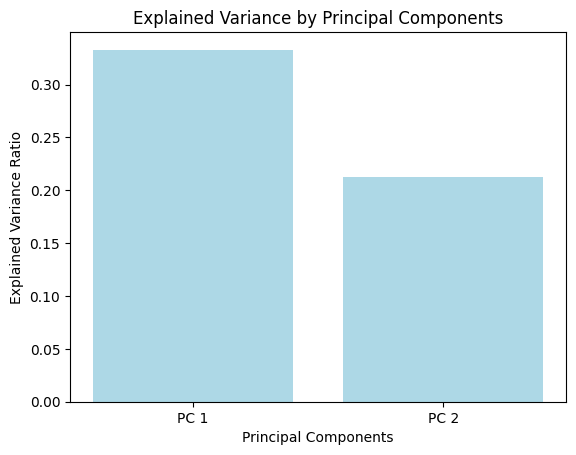

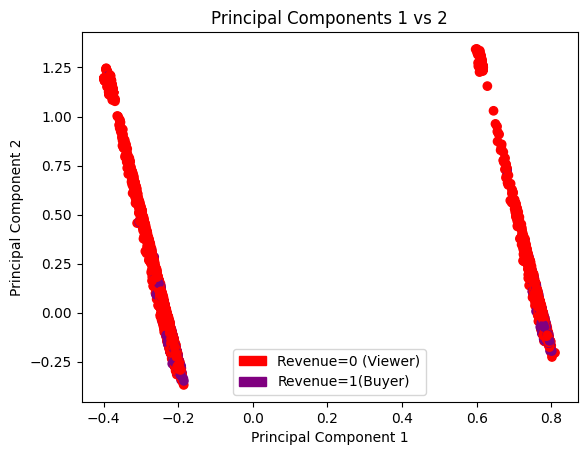

In [6]:
# Visualise explained variance
plt.bar([f'PC {i}' for i in range(1, 3)],
        explained_variance, color='lightblue')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

colors = ['red' if label == 0 else 'purple' for label in y]
plt.scatter(x=pca_df['Principal Component 1'], y=pca_df['Principal Component 2'],
            c=colors)
plt.title('Principal Components 1 vs 2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

Viewer = mpatches.Patch(color='red', label='Revenue=0 (Viewer)')
Buyer = mpatches.Patch(color='purple', label='Revenue=1(Buyer)')

plt.legend(handles=[Viewer, Buyer])
plt.show()

# Part 3

## 3.1 Affinity Propagation Clustering

In [7]:
# data_scaled_df is preprocessed dataset
clustering = AffinityPropagation(random_state=5).fit(pca_df)

# Labels
labels = clustering.labels_

# visualzation
plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=labels, cmap='viridis')
plt.colorbar(scatter)
plt.title("Affinity Propagation Clustering (PC1 vs PC2)")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()


## 3.2 DBSCAN Clustering

In [ ]:
X = pca_df[['Principal Component 1', 'Principal Component 2']]
dbscan = DBSCAN(eps=0.4, min_samples=2).fit(X)

# Labels
labels_dbscan = dbscan.labels_

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X['Principal Component 1'], X['Principal Component 2'], c=labels_dbscan, cmap='viridis')
# plt.colorbar(scatter)
plt.title("DBSCAN Clustering (Principal Component 1 vs principal Component 2)")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

NameError: name 'pca_df' is not defined

## 3.3 Birch Clustering

In [ ]:
birch = Birch(n_clusters=3, threshold=0.5)
birch.fit(X)

# Get cluster labels
labels_birch = birch.labels_

# Visualize
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X['Principal Component 1'], X['Principal Component 2'], c=labels_birch, cmap='viridis')

plt.title("BIRCH Clustering (Principal Component 1 vs Principal Componenet 2)")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Part 4

## 4.1 Silhouette Score

In [ ]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

def silhouette_score(points, labels):
    n = len(points)
    unique_clusters = set(labels)

    silhouette_scores = []

    for i in range(n):
        current_point = points[i]
        current_cluster = labels[i]

        # Intra-cluster distance: average distance to all other points in the same cluster
        same_cluster_points = [points[j] for j in range(n) if labels[j] == current_cluster and j != i]
        if same_cluster_points:
            a_i = sum(euclidean_distance(current_point, p) for p in same_cluster_points) / len(same_cluster_points)
        else:
            a_i = 0  # When there's no other point in the same cluster

        # Inter-cluster distance: minimum average distance to points in any other cluster
        b_i = float('inf')
        for other_cluster in unique_clusters:
            if other_cluster == current_cluster:
                continue
            other_cluster_points = [points[j] for j in range(n) if labels[j] == other_cluster]
            if other_cluster_points:
                avg_distance = sum(euclidean_distance(current_point, p) for p in other_cluster_points) / len(other_cluster_points)
                b_i = min(b_i, avg_distance)

        # Calculate silhouette score for point i
        if a_i == 0 and b_i == 0:
            silhouette = 0
        else:
            silhouette = (b_i - a_i) / max(a_i, b_i)
        silhouette_scores.append(silhouette)

    # Average silhouette score for all points
    overall_silhouette_score = sum(silhouette_scores) / n
    return overall_silhouette_score

print(f"Silhouette Score for DBSCAN: {silhouette_score(X.values, labels_dbscan)}")
print(f"Silhouette Score for BIRCH: {silhouette_score(X.values, labels_birch)}")

## 4.2 Davies-Bouldin Score

In [ ]:
def evaluate_davies_bouldin(X, labels_dbscan, labels_birch):
    score_dbscan = davies_bouldin_score(X, labels_dbscan)
    score_birch = davies_bouldin_score(X, labels_birch)

    print(f"Davies-Bouldin Score for DBSCAN: {score_dbscan}")
    print(f"Davies-Bouldin Score for BIRCH: {score_birch}")
    return [score_dbscan, score_birch]

X = pca_df[['Principal Component 1', 'Principal Component 2']]
evaluate_davies_bouldin(X, labels_dbscan, labels_birch)

##4.3 Calsinki-Harabasz Index

In [ ]:
# Make a function to evaluate three models in Task 3 at once
def evaluate_calinski_harabasz(X, labels_dbscan, labels_birch):
    score_dbscan = calinski_harabasz_score(X, labels_dbscan)
    score_birch = calinski_harabasz_score(X, labels_birch)

    print(f"Calinski-Harabasz Score for DBSCAN: {score_dbscan}")
    print(f"Calinski-Harabasz Score for BIRCH: {score_birch}")
    return [score_dbscan, score_birch]

## change the X to the clustering variable
X = pca_df[['Principal Component 1', 'Principal Component 2']]
evaluate_calinski_harabasz(X, labels_dbscan, labels_birch)

## Comparison Chart for Evaluation

In [ ]:
silhouette_metrics = ['Silhouette Score']
db_metrics = ['Davies-Bouldin Score']
ch_metrics = ['Calinski Harabasz Index']
scores = [
    [silhouette_score(X.values, labels_dbscan), silhouette_score(X.values, labels_birch)],
    [(evaluate_davies_bouldin(X, labels_dbscan, labels_birch))],
    [(evaluate_calinski_harabasz(X, labels_dbscan, labels_birch))]
]

evaluation_fig_silhouette = go.Figure(data=[
    go.Bar(name='DBSCAN', x=silhouette_metrics, y=[scores[0][0][0]]),
    go.Bar(name='BIRCH', x=silhouette_metrics, y=[scores[0][0][1]])
])

evaluation_fig_silhouette.update_layout(
    title='Comparison of Clustering Performance Metrics',
    xaxis_title='Silhouette Score',
    yaxis_title='Score',
    barmode='group'
)

evaluation_fig_silhouette.show()

evaluation_fig_db = go.Figure(data=[
    go.Bar(name='DBSCAN', x=db_metrics, y=[scores[1][0][0]]),
    go.Bar(name='BIRCH', x=db_metrics, y=[scores[1][0][1]])
])

evaluation_fig_db.update_layout(
    title='Comparison of Clustering Performance Metrics',
    xaxis_title='Davies Bouldin Score',
    yaxis_title='Score',
    barmode='group'
)

evaluation_fig_db.show()

evaluation_fig_ch = go.Figure(data=[
    go.Bar(name='DBSCAN', x=ch_metrics, y=[scores[2][0][0]]),
    go.Bar(name='BIRCH', x=ch_metrics, y=[scores[2][0][1]])
])

evaluation_fig_ch.update_layout(
    title='Comparison of Clustering Performance Metrics',
    xaxis_title='Calsinki Harabasz Index',
    yaxis_title='Score',
    barmode='group'
)

evaluation_fig_ch.show()

# 5. Distance Functions

## 5.1 Eucledian Distance

In [ ]:
X = pca_df[['Principal Component 1', 'Principal Component 2']]
# euclidean_X = cdist (X, X, metric=euclidean_distance)

dbscan = DBSCAN(eps=0.01, min_samples=2, metric=euclidean_distance).fit(X)
# Labels
euclidean_labels_dbscan = dbscan.labels_

# Visualize
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X['Principal Component 1'], X['Principal Component 2'], c=euclidean_labels_dbscan, cmap='viridis')

plt.title("DBSCAN Clustering with Euclidean Distance (Principal Component 1 vs principal Component 2)")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## 5.2 Manhattan Distance

In [ ]:
def manhattan_distance(point1, point2):
    distance = 0
    for x1, x2 in zip(point1, point2):
        distance += abs(x1 - x2)
    return distance

X = pca_df[['Principal Component 1', 'Principal Component 2']]

dbscan = DBSCAN(eps=0.01, min_samples=2, metric=manhattan_distance).fit(X)
# Labels
manhattan_labels_dbscan = dbscan.labels_

# Visualize
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X['Principal Component 1'], X['Principal Component 2'], c=manhattan_labels_dbscan, cmap='viridis')
plt.title("DBSCAN Clustering with Manhattan Distance (Principal Component 1 vs principal Component 2)")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


## 5.3 Cosine Similarity



In [ ]:
def cosine_similarity_distance(point1, point2):
    vec1 = np.array(point1)
    vec2 = np.array(point2)
    dot_product = np.dot(vec1, vec2)
    magnitude_vec1 = np.linalg.norm(vec1)
    magnitude_vec2 = np.linalg.norm(vec2)
    cosine_sim = dot_product / (magnitude_vec1 * magnitude_vec2)
    return 1- cosine_sim

X = pca_df[['Principal Component 1', 'Principal Component 2']]

dbscan = DBSCAN(eps=0.01, min_samples=2, metric=cosine_similarity_distance).fit(X)
# Labels
cosine_labels_dbscan = dbscan.labels_

# Visualize
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X['Principal Component 1'], X['Principal Component 2'], c=cosine_labels_dbscan, cmap='viridis')

plt.title("DBSCAN Clustering with Cosine Similarity Distance (Principal Component 1 vs principal Component 2)")
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## 5.4 Evaluation

In [ ]:
print(f"Davies-Bouldin Score for DBSCAN with Eucledian Distance: {davies_bouldin_score(X, euclidean_labels_dbscan)}")
print(f"Davies-Bouldin Score for DBSCAN with Manhattan Distance: {davies_bouldin_score(X, manhattan_labels_dbscan)}")
print(f"Davies-Bouldin Score for DBSCAN with Cosine Distance: {davies_bouldin_score(X, cosine_labels_dbscan)}")

distances = ['Eucledian', 'Manhattan', 'Cosine Similarity']
db_values = [davies_bouldin_score(X, euclidean_labels_dbscan), davies_bouldin_score(X, manhattan_labels_dbscan), davies_bouldin_score(X, cosine_labels_dbscan)]

distance_comparison_fig = go.Figure(data=[
    go.Bar(
        x=distances,
        y=db_values,
        text=[f"{db:.2f}" for db in db_values],
        textposition='auto'
    )
])

distance_comparison_fig.update_layout(
    title='Comparison of Davies-Bouldin Scores for Different Distance Metrics',
    xaxis_title='Distance Metric',
    yaxis_title='Davies-Bouldin Score',
    yaxis=dict(range=[0, max(db_values) * 1.1])
)

distance_comparison_fig.show()